*App for Celebrity Face Recognition and Face Finder*

The DataSet used is taken from;https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tf_keras.utils import to_categorical
from tf_keras.preprocessing import image
import matplotlib.pyplot as plt
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import compute_class_weight
import random
from graphviz import Digraph

 Intended Use of Libraries;

import OS Purpose: Used to perform file and directory operations. For example, to navigate in a directory, read filenames or merge file paths.

import cv2 Purpose: A library for computer vision applications.

import numpy as np Purpose: A library for numerical calculations and operations with large data arrays.
from sklearn.model_selection import train_test_split Purpose: Used to split a dataset into training and test sets.

from tf_keras.utils import to_categorical Purpose: To convert labels to one-hot encoding format.

from tf_keras.preprocessing import image Purpose: Used for image processing and data augmentation.

import matplotlib.pyplot as plt Purpose: Used for data visualization and graph plotting.


from tf_keras.models import Sequential Objective: To create deep learning models by defining layers in a sequential way.

from tf_keras.layers import Conv2D Objective: Used to add convolution layers. Used to learn the properties of the images.

from tf_keras.layers import MaxPooling2D Purpose: Used to minimize feature maps and preserve important information.

from tf_keras.layers import Flatten Purpose: Used to convert a multidimensional input into a one-dimensional vector.

from tf_keras.layers import Dense Purpose: Used to define densely connected (fully connected) layers.
from tf_keras.layers import Dropout Objective: Disables a certain percentage of neurons to prevent overfitting (overlearning).

from sklearn.utils.compute_class_weight Purpose: Calculate class weights to handle unbalanced class distributions.

import random Purpose: Used to perform random number and selection operations.





In [2]:
dataset_dir = 'Dataset'

images = []
labels = []

In [3]:
data = pd.read_csv('Dataset.csv')
data.head(100)

,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan
...,...,...
95,Zac Efron_87.jpg,Zac Efron
96,Priyanka Chopra_81.jpg,Priyanka Chopra
97,Hrithik Roshan_99.jpg,Hrithik Roshan
98,Hrithik Roshan_66.jpg,Hrithik Roshan


In [4]:
photo_count = 0
class_names = sorted(os.listdir(dataset_dir))
class_map = {name: idx for idx, name in enumerate(class_names)}
for class_name in class_names:
        class_path = os.path.join(dataset_dir, class_name)
        photos = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        photo_count += len(photos)
print("Class names:", class_names)
print(f"Class Number: {len(class_names) }")
print(f"Photo Count: {photo_count}")

Class names: ['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise']
Class Number: 27
Photo Count: 2209


In [5]:

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)


                img = image.load_img(img_path, target_size=(128, 128))
                img_array = image.img_to_array(img)

                images.append(img_array)
                labels.append(class_map[class_name])

In [6]:
X = np.array(images)
print("X =", X)

y = np.array(labels)
print("y =", y)

X = [[[[139. 149. 161.]
   [130. 140. 152.]
   [118. 126. 139.]
   ...
   [119. 122. 129.]
   [146. 146. 154.]
   [142. 142. 150.]]

  [[132. 142. 154.]
   [123. 133. 145.]
   [117. 125. 136.]
   ...
   [128. 131. 138.]
   [131. 131. 139.]
   [131. 131. 139.]]

  [[113. 121. 134.]
   [108. 116. 127.]
   [118. 126. 137.]
   ...
   [128. 133. 139.]
   [127. 127. 135.]
   [111. 111. 119.]]

  ...

  [[ 58.  64.  52.]
   [ 53.  61.  46.]
   [ 91. 100.  81.]
   ...
   [161. 126. 106.]
   [167. 132. 112.]
   [169. 134. 114.]]

  [[ 65.  75.  66.]
   [ 68.  80.  68.]
   [118. 132. 109.]
   ...
   [161. 126. 106.]
   [163. 128. 108.]
   [164. 129. 109.]]

  [[ 45.  57.  47.]
   [ 58.  70.  58.]
   [122. 136. 113.]
   ...
   [161. 126. 106.]
   [160. 125. 105.]
   [160. 125. 105.]]]


 [[[ 24.  24.  16.]
   [ 23.  23.  15.]
   [ 21.  21.  13.]
   ...
   [ 18.  18.  10.]
   [ 22.  22.  14.]
   [ 23.  23.  15.]]

  [[ 23.  23.  15.]
   [ 23.  23.  15.]
   [ 21.  21.  13.]
   ...
   [ 18.  18.  10

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0


y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))
print("X_train :", X_train)
print("X_test  :", X_test)
print("y_train :", y_train)
print("y_test  :", y_test)

X_train : [[[[0.13333334 0.1764706  0.10980392]
   [0.10588235 0.14901961 0.08235294]
   [0.17254902 0.20784314 0.14117648]
   ...
   [0.12156863 0.13333334 0.09803922]
   [0.15294118 0.14117648 0.12156863]
   [0.16470589 0.15294118 0.13333334]]

  [[0.13725491 0.18039216 0.11372549]
   [0.10588235 0.14901961 0.08235294]
   [0.14509805 0.18039216 0.11372549]
   ...
   [0.09411765 0.10588235 0.07058824]
   [0.10196079 0.09803922 0.07843138]
   [0.10588235 0.10196079 0.08235294]]

  [[0.09803922 0.13333334 0.06666667]
   [0.12941177 0.16470589 0.09803922]
   [0.14117648 0.1764706  0.10980392]
   ...
   [0.09019608 0.11764706 0.08627451]
   [0.09411765 0.11372549 0.08627451]
   [0.09803922 0.11764706 0.09019608]]

  ...

  [[0.0627451  0.13333334 0.07843138]
   [0.06666667 0.12156863 0.0627451 ]
   [0.10588235 0.11764706 0.04313726]
   ...
   [0.06666667 0.09411765 0.06666667]
   [0.0627451  0.09019608 0.0627451 ]
   [0.0627451  0.09019608 0.0627451 ]]

  [[0.05490196 0.13725491 0.0784313

In [8]:
class_weights = compute_class_weight('balanced', classes=np.arange(len(class_names)), y=y_train.argmax(axis=1))
class_weights = dict(enumerate(class_weights))

print("Class weights:", class_weights)



Class weights: {0: np.float64(1.4873737373737375), 1: np.float64(0.9624183006535948), 2: np.float64(1.0907407407407408), 3: np.float64(1.1092278719397364), 4: np.float64(0.9484702093397746), 5: np.float64(1.308888888888889), 6: np.float64(0.6888888888888889), 7: np.float64(0.9217527386541471), 8: np.float64(0.9624183006535948), 9: np.float64(0.8284106891701828), 10: np.float64(0.9624183006535948), 11: np.float64(1.392434988179669), 12: np.float64(1.1481481481481481), 13: np.float64(1.0728597449908925), 14: np.float64(0.7699346405228759), 15: np.float64(0.7791005291005291), 16: np.float64(0.7271604938271605), 17: np.float64(0.7699346405228759), 18: np.float64(3.4444444444444446), 19: np.float64(1.128352490421456), 20: np.float64(1.0907407407407408), 21: np.float64(2.974747474747475), 22: np.float64(0.7884872824631861), 23: np.float64(0.7981029810298103), 24: np.float64(0.7436868686868687), 25: np.float64(1.0225694444444444), 26: np.float64(1.2832244008714597)}


In [9]:
print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Train Data Shape: (1767, 128, 128, 3)
Test Data Shape: (442, 128, 128, 3)


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)     

In [11]:
# Create a Graphviz Digraph
dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})

# Add layers to the graph
dot.node('Input', 'Input\n128x128x3', shape='box', style='filled', color='lightblue')
dot.node('Conv1', 'Conv2D\n32 filters\n3x3', shape='box')
dot.node('Pool1', 'MaxPooling2D\n2x2', shape='box')
dot.node('Conv2', 'Conv2D\n64 filters\n3x3', shape='box')
dot.node('Pool2', 'MaxPooling2D\n2x2', shape='box')
dot.node('Conv3', 'Conv2D\n128 filters\n3x3', shape='box')
dot.node('Pool3', 'MaxPooling2D\n2x2', shape='box')
dot.node('Flatten', 'Flatten', shape='ellipse')
dot.node('Dense1', 'Dense\n256 units\nReLU', shape='box', style='filled', color='lightgreen')
dot.node('Dropout', 'Dropout\nrate=0.5', shape='diamond', style='filled', color='orange')
dot.node('Output', 'Dense\n10 classes\nSoftmax', shape='box', style='filled', color='yellow')

# Connect nodes
dot.edges([
    ('Input', 'Conv1'),
    ('Conv1', 'Pool1'),
    ('Pool1', 'Conv2'),
    ('Conv2', 'Pool2'),
    ('Pool2', 'Conv3'),
    ('Conv3', 'Pool3'),
    ('Pool3', 'Flatten'),
    ('Flatten', 'Dense1'),
    ('Dense1', 'Dropout'),
    ('Dropout', 'Output')
])


![alt-text](/PythonProject3/model_architecture.png )

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=35,  # I found 20 suitable for the test, but you can change it
    batch_size=64,
    class_weight=class_weights
)

Epoch 1/3


28/28 [==============================] - 17s 522ms/step - loss: 3.3363 - accuracy: 0.0504 - val_loss: 3.2532 - val_accuracy: 0.0995
Epoch 2/3
28/28 [==============================] - 14s 508ms/step - loss: 3.0626 - accuracy: 0.1239 - val_loss: 2.6422 - val_accuracy: 0.2783
Epoch 3/3
28/28 [==============================] - 17s 600ms/step - loss: 2.5128 - accuracy: 0.2779 - val_loss: 2.2168 - val_accuracy: 0.3733


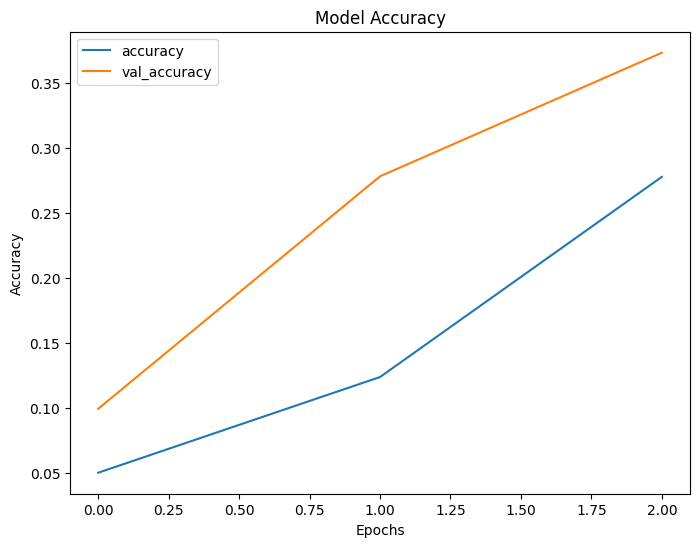

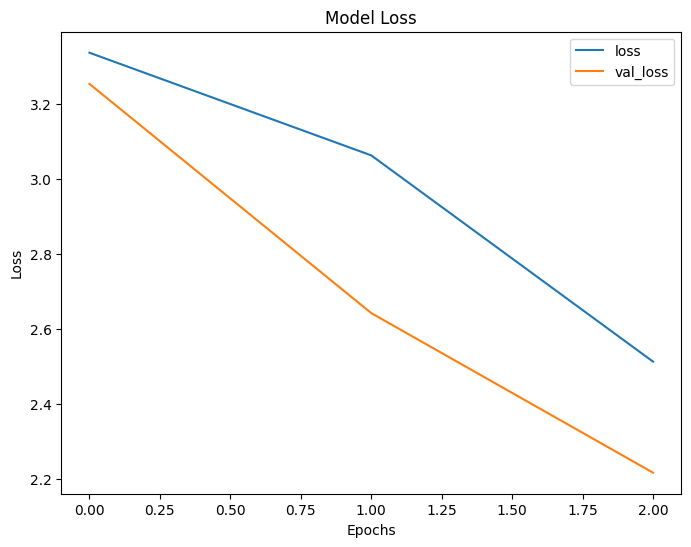

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

14/14 - 1s - loss: 2.2168 - accuracy: 0.3733 - 926ms/epoch - 66ms/step
Test Loss: 2.216768980026245
Test Accuracy: 0.3733031749725342


1/1 [==============================] - 0s 36ms/step


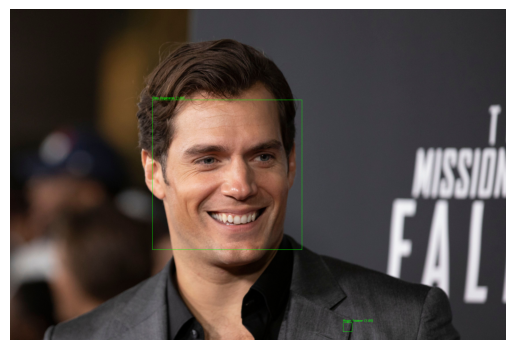

1/1 [==============================] - 0s 41ms/step


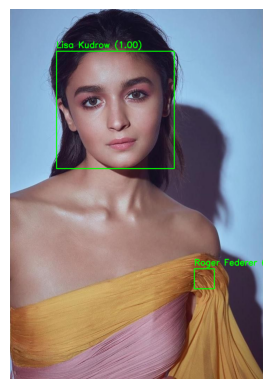

input\Roger Federer_23.jpg: Face unidentified!
1/1 [==============================] - 0s 38ms/step


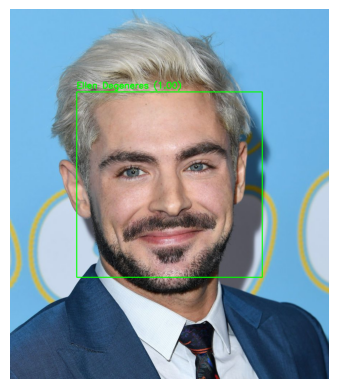

1/1 [==============================] - 0s 37ms/step


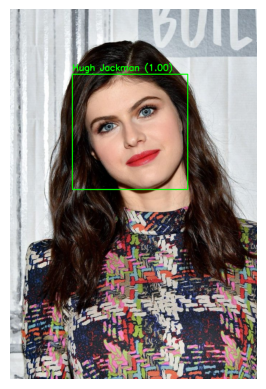

1/1 [==============================] - 0s 36ms/step


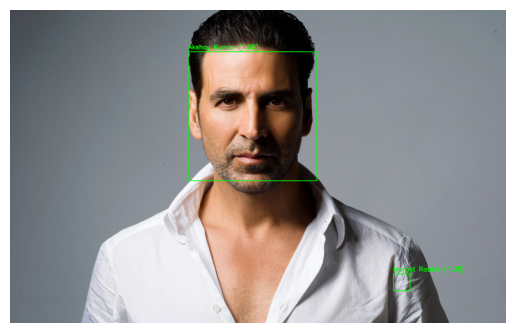

1/1 [==============================] - 0s 40ms/step


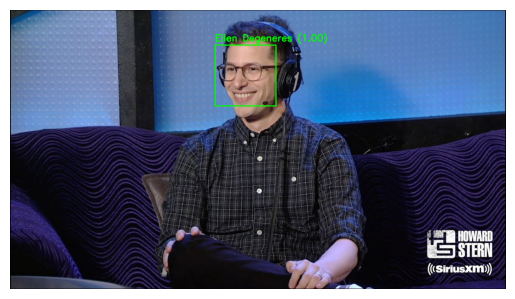

1/1 [==============================] - 0s 37ms/step


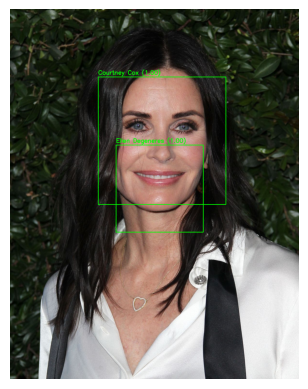

1/1 [==============================] - 0s 36ms/step


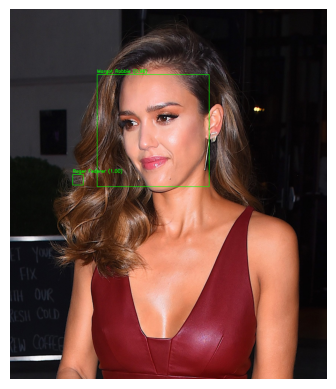

1/1 [==============================] - 0s 34ms/step


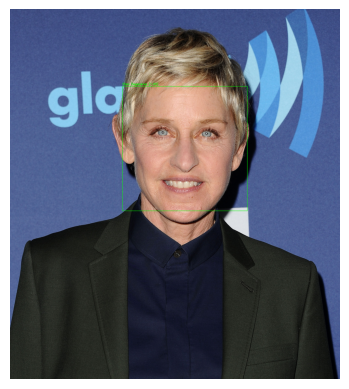

In [15]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def preprocess_image(image, img_size=(128, 128)):
    image = cv2.resize(image, img_size)

    image = np.expand_dims(image, axis=0)
    return image


input_folder = "input"
all_image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(all_image_files, min(10, len(all_image_files)))

for input_image_name in random_images:
    input_image_path = os.path.join(input_folder, input_image_name)


    image = cv2.imread(input_image_path)

    if image is None:
        print(f"Image dont loading {input_image_path}  ")
    else:


        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) == 0:
            print(f"{input_image_path}: Face unidentified!")
        else:
            for (x, y, w, h) in faces:

                side_length = max(w, h)
                x_center = x + w // 2
                y_center = y + h // 2


                x = x_center - side_length // 2
                y = y_center - side_length // 2
                cv2.rectangle(image, (x, y), (x + side_length, y + side_length), (0, 255, 0), 2)


                face_image = image[y:y + side_length, x:x + side_length]
                rgb_face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
                resized_face_image = preprocess_image(rgb_face_image)


                predictions = model.predict(resized_face_image)
                class_index = np.argmax(predictions)
                confidence = predictions[0][class_index]


                name = class_names[class_index] if confidence > 0.6 else "Unknown"


                cv2.putText(image, f"{name} ({confidence:.2f})", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb_image)
            plt.axis("off")
            plt.show()
